# Outlier treatment methods

## Z-score method

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./CarPricesData.csv')

In [3]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


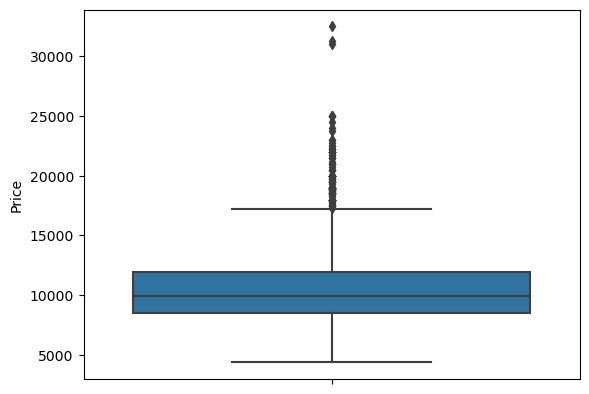

In [4]:
sns.boxplot(data=data, y='Price')
plt.show()

In [5]:
data['z_score'] = stats.zscore(data.Price)

In [6]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,z_score
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715


In [7]:
cleaned_data = data[data['z_score']<3]
cleaned_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,z_score
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715


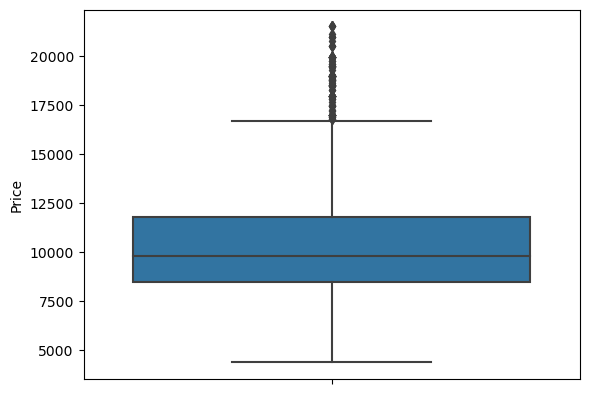

In [8]:
sns.boxplot(data=cleaned_data, y='Price')
plt.show()

# Percentile Capping Method:
The percentile capping method removes outliers that fall above or below a certain percentile threshold. For example, we can remove data points that fall above the 95th percentile or below the 5th percentile.

In [9]:
lower = np.nanpercentile(data.Price, 5)
upper = np.nanpercentile(data.Price, 95)

In [10]:
cleaned_data = np.clip(data.Price, lower, upper)

In [11]:
cleaned_data

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [12]:
data1 = data[data['Price'] == cleaned_data]

In [13]:
data.shape

(1436, 11)

In [14]:
data1.shape

(1308, 11)

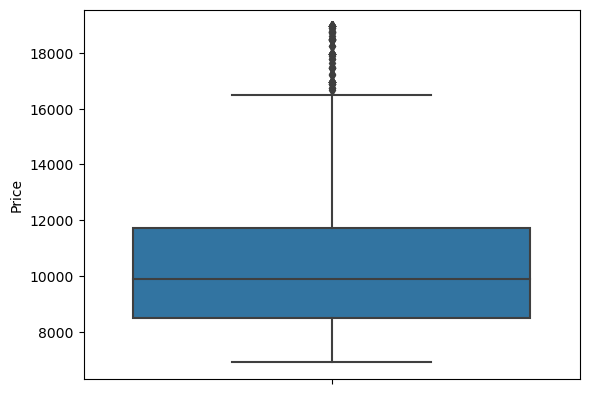

In [15]:
sns.boxplot(data=data1, y='Price')
plt.show()

# Winsorization 

In [16]:
import scipy.stats as stasts

In [17]:
winsorized_price = stasts.mstats.winsorize(data.Price, limits=[0.05, 0.05])

In [18]:
winsorized_price 

masked_array(data=[13500, 13750, 13950, ...,  8500,  7250,  6950],
             mask=False,
       fill_value=999999,
            dtype=int64)

In [19]:
data['winsorized_price'] = winsorized_price

In [20]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,z_score,winsorized_price
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763,13500
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715,13750
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877,13950
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685,14950
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715,13750
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0,-0.891089,7500
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0,0.031491,10845
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0,-0.615281,8500
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0,-0.960042,7250


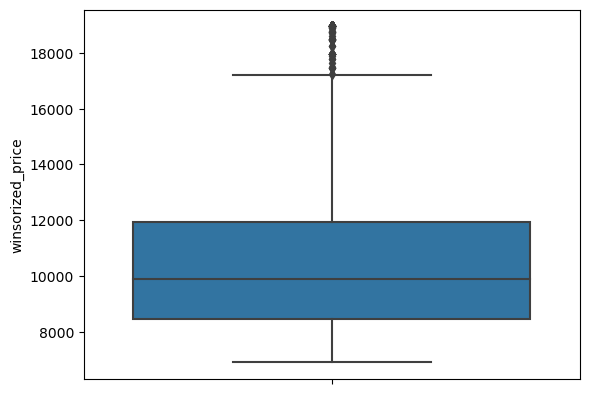

In [21]:
sns.boxplot(y = data.winsorized_price)
plt.show()

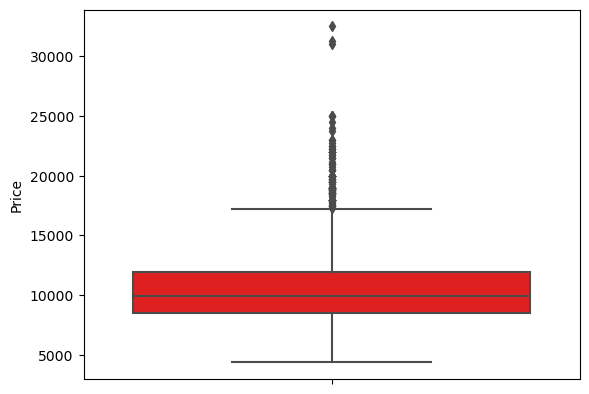

In [22]:
sns.boxplot(y = data.Price, color='red')
plt.show()